# Task 5 To Explore Business Analytics 
## ByJayant Jain

* Perform ‘Exploratory Data Analysis’ on the provided dataset SampleSuperstore

#### Problem statement: 

You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

![img](https://media-exp1.licdn.com/dms/image/C5612AQHBEWmvDaU8Ew/article-cover_image-shrink_720_1280/0?e=1605139200&v=beta&t=zqHzwyemE9yRGXxgBm_t6hbxDsJT9AKM34mAXgUvW64)

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
%matplotlib inline
# pandas defaults
pd.options.display.max_columns = 500
#pd.options.display.max_rows = 500

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### No Null Values Reported 

## Performing Basic Cleansing

In [4]:
print("Number of Duplicate Enteries: ", df.duplicated().sum())
df=df.drop_duplicates()
df.shape

Number of Duplicate Enteries:  17


(9977, 13)

In [5]:
print("Number of Uniques Entites each column contains: ")
df.nunique()

Number of Uniques Entites each column contains: 


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [6]:
#Dropping unecessory Data
df = df.drop(['Postal Code','Country'], axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


#### Findings:
* Maximum and Minimum sales in single shipment: 22638.48 and 0.44
* Maximum and Minimum Quantities sent in a single shipment: 14 and 1
* Average Quantities sent in a single shipment: 4
* Maximum Profit in a single shipment: 8399.97
* Average Profit: 28.69
* Maximum Loss in a single shipment: 6599.97

## Creating Visual Graphs for Analysis

In [8]:
corr = df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


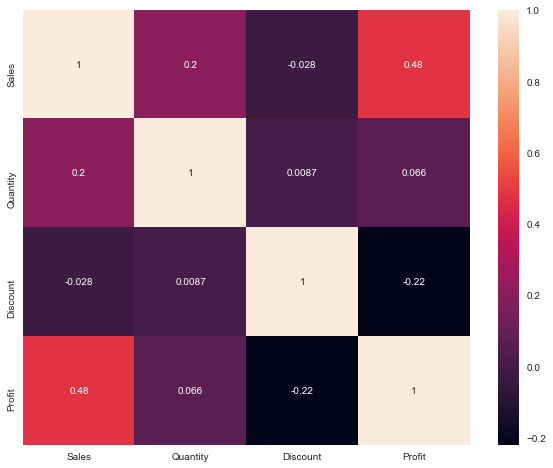

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True)
plt.show()

#### Findings: 
* Profit and Sales Depends a lot on each other, if sales decreases profit also decreases
* Quantity and profit also depends on each other, if quantites sold decreases profit also decreases

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


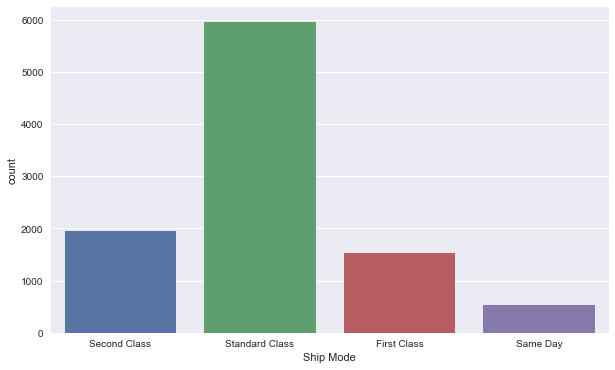

In [10]:
print (df['Ship Mode'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=df['Ship Mode'])
plt.show()

#### Findings: 
* Majority of the people (59.68%) Opted for Standard Shipment
* Only 5.4% people opted for same day shipment

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


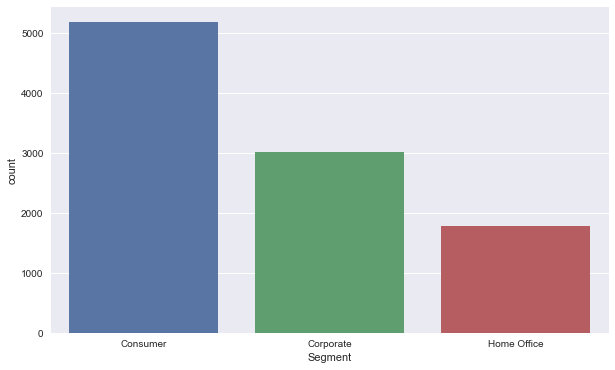

In [11]:
print (df['Segment'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=df['Segment'])
plt.show()

#### Findings: 
* 51.94% Goods were shiped for regular people (Consumers)
* 17.83% Goods were shipped to for Home Offices

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Houston          375
Chicago          313
Columbus         221
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          114
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Miami             57
Louisville        57
Rochester         53
Charlotte         52
Henderson         51
Lakewood          49
Lancaster         46
Fairfield         45
Milwaukee         45
Denver            44
Lawrence          44
Baltimore         43
San Jose          42
Cleveland         42
Pasadena          42
Fayetteville      41
Salem             39
Austin            39
Atlanta           39
Franklin          37
Wilmington        36
Tampa             36
Huntsville        36
Decatur           35
Toledo            32
Tucson       

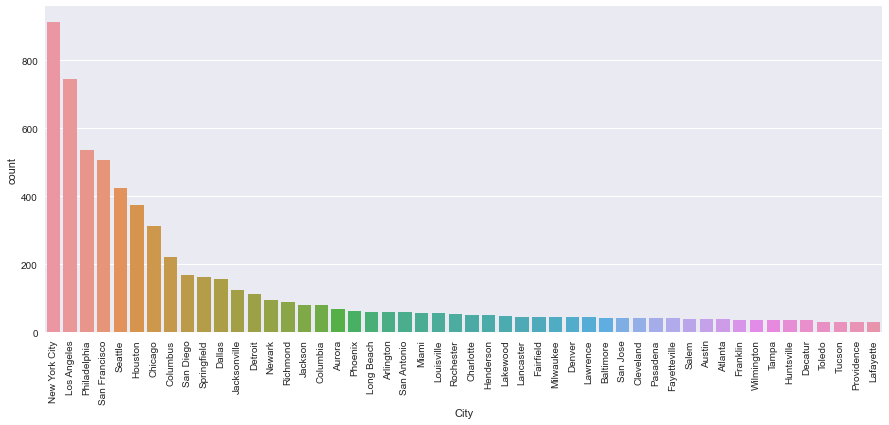

In [12]:
print (df['City'].value_counts().head(50))
plt.figure(figsize=(15,6))
sns.countplot(x=df['City'], order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()

#### Majority of Customers were from these 4 Cities:-
* 1) New York City (914)
* 2) Los Angeles (746)
* 3) Philadelphia (536)
* 4) San Fransico (506)


California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

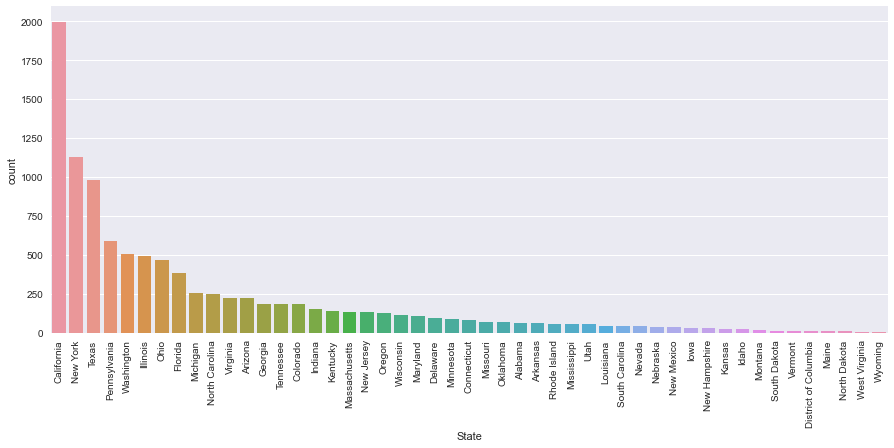

In [13]:
print (df['State'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=df['State'], order=(df['State'].value_counts()).index)
plt.xticks(rotation=90)
plt.show()

#### Majority of Customers were from these 3 States:-
* 1) California (1999)
* 2) New York (1127)
* 3) Texas (983)

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


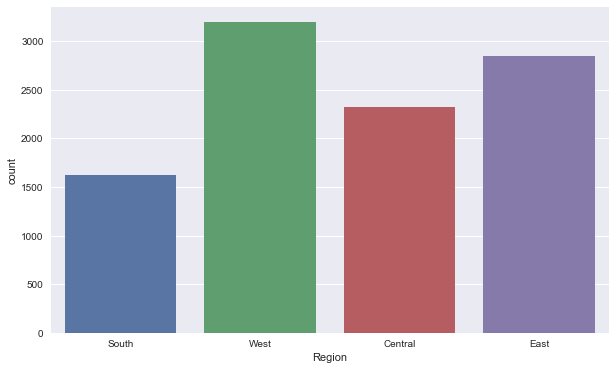

In [14]:
print (df['Region'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=df['Region'])
plt.show()

#### Majority (32%) People belonged to West US

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


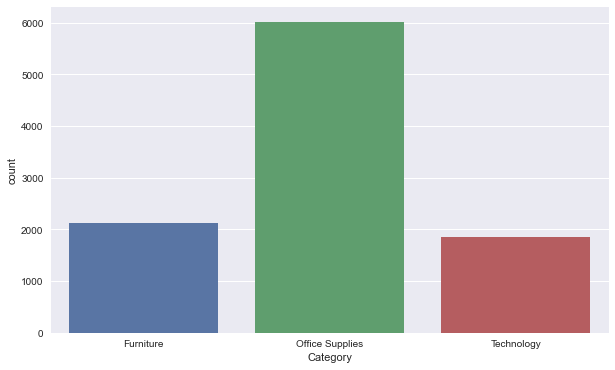

In [15]:
print (df['Category'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=df['Category'])
plt.show()

#### Office Supplies were the among the most sold Products 60.2%

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


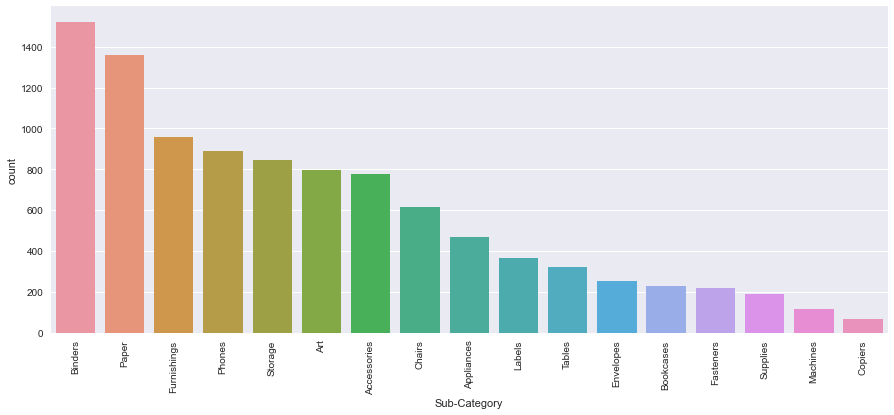

In [16]:
print (df['Sub-Category'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=df['Sub-Category'], order=(df['Sub-Category'].value_counts()).index)
plt.xticks(rotation=90)
plt.show()

#### Binders and Papers were the most Sold Item

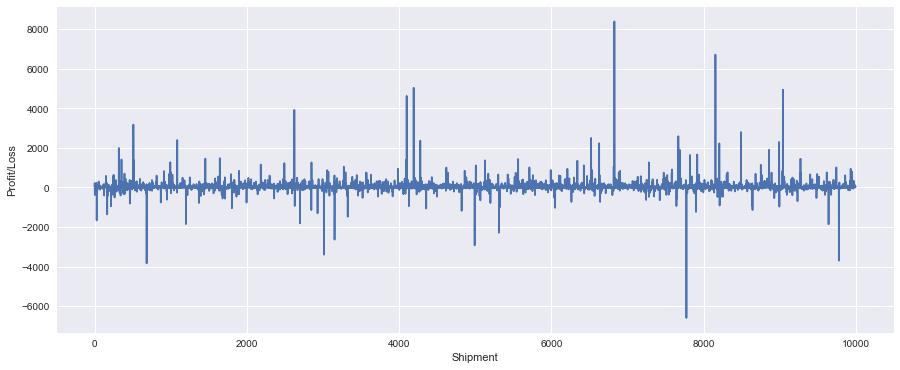

In [17]:
plt.figure(figsize=(15,6))
df['Profit'].index = df['Profit'].index.map(int) # let's change the index values of Haiti to type integer for plotting
df['Profit'].plot(kind='line')
plt.ylabel('Profit/Loss')
plt.xlabel('Shipment')
plt.show()

## Final Conclusion: 
* We Need to Stop Same day Delivery because people opting for 1 day delivery are very less
* we Should Shut Down Delivery operations in those cities having less then 3 Shipment Orders to minimize the operational cost of the company
* We need to increase Availaibilty of Office Supplies due to heavy demands and should dec out technology stocks due to less sale of products related to technology